<a href="https://colab.research.google.com/github/ass007-mouele/python/blob/master/AS__Pandas_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function to automatic merge and fill missing values
This quest is following the quest "Pandas merge and fill missing values"

## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion
Your function will return a new DataFrame which is the left merge of the both DataFrames, and which has no missing values (so your function has to fill them).

In [0]:
import pandas as pd
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [0]:
def merge_and_fill(DataFrameMain, DataFrameOpinion):
  NewDataFrame=pd.merge(DataFrameMain, DataFrameOpinion,how = 'left',left_on = ['DATE'], right_on = ['date'])
  NewDataFrame.drop(columns='date',axis=1,inplace=True)
  for colonne in NewDataFrame:
     NewDataFrame[colonne].fillna(method = 'ffill',inplace=True)
  return NewDataFrame

merge_and_fill(df_main, df_opinion)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad


## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [0]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv
import numpy as np
bigdataframe=pd.DataFrame()
for year in range(2010, 2019):
   link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_{}.csv".format(year)
   link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_{}.csv".format(year)
   df_main = pd.read_csv(link_main)
   df_opinion = pd.read_csv(link_opinion)
   bigdataframe=pd.concat([bigdataframe,merge_and_fill(df_main, df_opinion)],axis=0)

bigdataframe.index = np.arange(0,len(bigdataframe)) # on reorganise les index
bigdataframe

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2010-01-01,5,2,19,2,5,3,0.0,86,10.000,1012,62.875,5,3,-1,119.0,0.0,1.0,5.1,very bad
1,2010-01-02,5,-1,6,-1,4,1,0.0,78,10.000,1022,31.375,5,0,2,116.0,0.0,1.0,8.7,very bad
2,2010-01-03,5,1,26,2,4,2,0.3,61,9.875,1021,65.500,5,0,-3,119.0,0.0,1.0,6.9,very bad
3,2010-01-04,1,-4,25,-2,0,-3,0.0,75,10.000,1017,9.875,1,0,-9,113.0,0.0,1.0,8.7,very bad
4,2010-01-05,2,-5,20,-5,1,-4,0.0,71,10.000,1012,8.000,3,0,-10,113.0,0.0,1.0,8.7,very bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad
3283,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad
3284,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad
3285,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad


## Add 2019

In [0]:
link2019 = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_2019=pd.read_csv(link2019)
bigdataframe=pd.concat([bigdataframe,df_2019],axis=0)
bigdataframe


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,MONTH,DAY
0,2010-01-01,5,2,19,2,5,3,0.0,86,10.000,1012,62.875,5,3,-1,119.0,0.0,1.0,5.1,very bad,NaN,NaN,NaN,NaN
1,2010-01-02,5,-1,6,-1,4,1,0.0,78,10.000,1022,31.375,5,0,2,116.0,0.0,1.0,8.7,very bad,NaN,NaN,NaN,NaN
2,2010-01-03,5,1,26,2,4,2,0.3,61,9.875,1021,65.500,5,0,-3,119.0,0.0,1.0,6.9,very bad,NaN,NaN,NaN,NaN
3,2010-01-04,1,-4,25,-2,0,-3,0.0,75,10.000,1017,9.875,1,0,-9,113.0,0.0,1.0,8.7,very bad,NaN,NaN,NaN,NaN
4,2010-01-05,2,-5,20,-5,1,-4,0.0,71,10.000,1012,8.000,3,0,-10,113.0,0.0,1.0,8.7,very bad,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,1033,57.625,13,10,8,116.0,0.0,1.0,8.7,not good not bad,119.0,143.0,12.0,27.0
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,1035,39.500,11,9,4,116.0,0.0,1.0,6.9,very bad,143.0,116.0,12.0,28.0
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,1034,4.000,9,4,0,116.0,0.0,1.0,8.7,very bad,116.0,116.0,12.0,29.0
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,1033,1.875,12,4,4,113.0,0.0,1.0,8.7,very bad,113.0,113.0,12.0,30.0


# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 10 seasonality for the 10 summers/winters alternance.


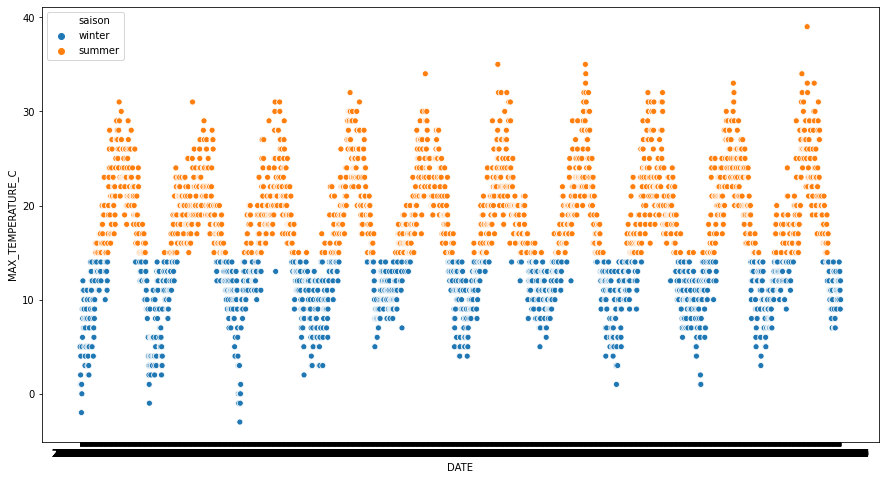

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
# On defini l'hiver a "MAX_TEMPERATURE_C" < 15 et été si contraire  dans une nouvelle colonne 
bigdataframe["saison"]=["winter" if valeur < 15 else "summer" for  valeur in bigdataframe["MAX_TEMPERATURE_C"]]
plt.figure(figsize=(15,8))
sns.scatterplot(x=bigdataframe["DATE"],y=bigdataframe["MAX_TEMPERATURE_C"],hue='saison',data=bigdataframe)